In [0]:
storage_account_name = "formula1dljd"
storage_account_key  = "Yfpjvcq+VLJDQtvY+qJ87WFVc2nwd6O42lnMDY2cHIAMFGydjjlmOgt3BSY+3GJCanT4bqKcIuXtTyamDt1RwQ=="


spark.conf.set(
    f"fs.azure.account.key.{storage_account_name}.dfs.core.windows.net",
    f"{storage_account_key}")


raw_folder = "firstdataset"
raw_folder_path = f"abfss://{raw_folder}@{storage_account_name}.dfs.core.windows.net"

## Read the csv file

In [0]:
df=spark.read.option("header",True).csv(f'{raw_folder_path}/qs-world-university-rankings-2017-to-2022-V2.csv')
display(df)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3,730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3,879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5,877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7,925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8,442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21,824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7,733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11,143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4,696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1,912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7,551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6,091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_59

In [0]:
#count the number of rows and columns in a dataframe
print(f'Number of columns {len(df.columns)} and number of rows {df.count()}')


Number of columns 15 and number of rows 6482

In [0]:
#check whether the dataframe has any null values or not

df_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
df_Null

Out[4]: {'university': 0,
 'year': 0,
 'rank_display': 68,
 'score': 3662,
 'link': 0,
 'country': 0,
 'city': 178,
 'region': 0,
 'logo': 0,
 'type': 12,
 'research_output': 2,
 'student_faculty_ratio': 75,
 'international_students': 164,
 'size': 2,
 'faculty_count': 78}

In [0]:
#print rows where score and rank is null
display(df.filter((df['score'].isNull()) & (df['rank_display'].isNull())))

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count University of California, San Francisco 2017 null null https://www.topuniversities.com/universities/university-california-san-francisco United States San Francisco North America https://www.topuniversities.com/sites/default/files/university-of-california-san-francisco_90_small.jpg Public Very High 1.0 125 S 4,482 Karolinska Institutet 2017 null null https://www.topuniversities.com/universities/karolinska-institutet Sweden Stockholm Europe https://www.topuniversities.com/sites/default/files/karolinska-institutet_311_small.jpg Public Very High null null M 1,730 Jawaharlal Nehru University 2017 null null https://www.topuniversities.com/universities/jawaharlal-nehru-university India New Delhi Asia https://www.topuniversities.com/sites/default/files/jawaharlal-nehru-university_302_small.jpg Public Very High 15.0 240 M 565 INSEAD 2017 null null https://www.topuniversities.com/universities/insead France Fontainebleau Europe https://www.topuniversities.com/sites/default/files/insead_592560cf2aeae70239af4ba8_small.jpg Private Very High null null S null London Business School 2017 null null https://www.topuniversities.com/universities/london-business-school United Kingdom London Europe https://www.topuniversities.com/sites/default/files/london-business-school_592560cf2aeae70239af4be5_small.jpg Public Very High 17.0 1,613 S 106 Weizmann Institute of Science 2017 null null https://www.topuniversities.com/universities/weizmann-institute-science Israel Rehovot Asia https://www.topuniversities.com/sites/default/files/weizmann-institute-of-science_671_small.jpg Public Very High null null S null Baylor College of Medicine 2017 null null https://www.topuniversities.com/universities/baylor-college-medicine United States Houston North America https://www.topuniversities.com/sites/default/files/baylor-college-of-medicine_48_small.jpg Private Very High null 210 S 4,424 Cranfield University 2017 null null https://www.topuniversities.com/universities/cranfield-university United Kingdom Bedford Europe https://www.topuniversities.com/sites/default/files/cranfield-university_592560cf2aeae70239af4b15_small.jpg Public Very High 5.0 2,052 S 623 ESSEC Business School 2017 null null https://www.topuniversities.com/universities/essec-business-school France Cergy Europe https://www.topuniversities.com/sites/default/files/essec-business-school_198_small.jpg Private Very High null null M null EBS Business School 2017 null null https://www.topuniversities.com/universities/ebs-business-school Germany Wiesbaden Europe https://www.topuniversities.com/sites/default/files/ebs-business-school_203_small.jpg Private Medium 44.0 453 S null HEC Paris School of Management 2017 null null https://www.topuniversities.com/universities/hec-paris-school-management France Paris Europe https://www.topuniversities.com/sites/default/files/hec-paris-school-of-management_257_small.jpg Private Very High null null S null King Abdullah University of Science & Technology (KAUST) 2017 null null https://www.topuniversities.com/universities/king-abdullah-university-science-technology-kaust Saudi Arabia Thuwal Asia https://www.topuniversities.com/sites/default/files/king-abdullah-university-of-science-technology_2137_small.jpg Private Very High 7.0 676 S 145 Stockholm School of Economics 2017 null null https://www.topuniversities.com/universities/stockholm-school-economics Sweden null Europe https://www.topuniversities.com/sites/default/files/stockholm-school-of-economics_576_small.jpg Private Very High null null S null Bocconi University 2017 null null https://www.topuniversities.com/universities/bocconi-university Italy Milan Europe https://www.topuniversities.com/sites/default/files/bocconi-university_592560cf2aeae70239af4abf_small.jpg Private Very High 15.0 1,942 L 837 Université de Technologie de Compiègne (UTC) 2017 null null https://www.to

In [0]:
#CHECK THE NUMBER OF DISTINCT RECORDS IN A DATAFRAME
df_distinct=df.distinct()
print(df_distinct.count())

6482

In [0]:
#duplicated columns
allColumns = df.columns
import sys
from pyspark.sql import functions as f
from pyspark.sql import window as w

windowSpec = w.Window.partitionBy(allColumns).rowsBetween(-sys.maxsize, sys.maxsize)

abc=df.withColumn('e', (f.count('*').over(windowSpec) > 1).cast("int"))
#abc=df.withColumn('e', (f.count('*').over(windowSpec)))
abc=abc.filter(abc['e']>1)
display(abc)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count e

In [0]:
#remove rows which does not have a score
df=df.filter(df['score'].isNotNull())
print(df.count())
display(df)

2820

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3,730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3,879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5,877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7,925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8,442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21,824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7,733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11,143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4,696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1,912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7,551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6,091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_59

In [0]:
#remove row if there are empty values except rank_display
list1=[i for i in df.columns if i!='rank_display']
print(list1)
df=df.na.drop(subset=list1)
print(df.count())

df_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
df_Null

['university', 'year', 'score', 'link', 'country', 'city', 'region', 'logo', 'type', 'research_output', 'student_faculty_ratio', 'international_students', 'size', 'faculty_count']
2716
Out[9]: {'university': 0,
 'year': 0,
 'rank_display': 0,
 'score': 0,
 'link': 0,
 'country': 0,
 'city': 0,
 'region': 0,
 'logo': 0,
 'type': 0,
 'research_output': 0,
 'student_faculty_ratio': 0,
 'international_students': 0,
 'size': 0,
 'faculty_count': 0}

In [0]:
display(df)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3,730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3,879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5,877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7,925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8,442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21,824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7,733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11,143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4,696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1,912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7,551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6,091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_59

## how many universities are there year wise

In [0]:
display(df.groupBy("year").count().sort('count'))

year count 2018 390 2017 391 2020 479 2019 483 2021 486 2022 487

## Which year there were more international students?

In [0]:
from pyspark.sql.functions import sum, col, desc
display(df.groupBy("year").agg({'international_students': 'sum'}))

year sum(international_students) 2020 32132.518 2019 32723.117999999995 2017 17859.49499999999 2018 17992.976999999995 2022 33952.640999999974 2021 33456.263999999996

In [0]:
#we can clearly see that there are decimal numbers present in the international student column thus the groupby sum year wise in terms of international student  also contains decimal points which is not possible in real life. Thus we will truncate it and make it a whole number

In [0]:
display(df)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3,730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3,879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5,877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7,925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8,442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21,824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7,733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11,143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4,696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1,912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7,551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6,091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_59

In [0]:
df.printSchema()

root
-- university: string (nullable = true)
-- year: string (nullable = true)
-- rank_display: string (nullable = true)
-- score: string (nullable = true)
-- link: string (nullable = true)
-- country: string (nullable = true)
-- city: string (nullable = true)
-- region: string (nullable = true)
-- logo: string (nullable = true)
-- type: string (nullable = true)
-- research_output: string (nullable = true)
-- student_faculty_ratio: string (nullable = true)
-- international_students: string (nullable = true)
-- size: string (nullable = true)
-- faculty_count: string (nullable = true)

In [0]:
#from pyspark.sql.types import IntegerType,BooleanType,DateType
#df=df.withColumn("international_students",df.international_students.cast(IntegerType()))
#df.printSchema()

In [0]:
import re
v='3.705'

text = "The film Pulp Fiction was released in year 1994.56"
result = re.sub(r"[^0-9.]", "", v).strip()
print(float(result))

3.705

In [0]:
dataCollect = df.collect()
list1=[]
for row in dataCollect:
    num=float(re.sub(r"[^0-9.]", "", row['international_students']).strip())
    num=round(num)
    list1.append(num)

    

In [0]:
#https://towardsdatascience.com/5-ways-to-add-a-new-column-in-a-pyspark-dataframe-4e75c2fd8c08
import pyspark.sql.functions as F
from pyspark.sql.types import *
def round_offtheVal(value):
    num=float(re.sub(r"[^0-9.]", "", value).strip())
    num=round(num)
    return num
#convert to a UDF Function by passing in the function and return type of function
udfsomefunc = F.udf(round_offtheVal, IntegerType())
df_new = df.withColumn("international_students", udfsomefunc("international_students"))
display(df_new)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_592560cf2aeae7

In [0]:
#now the decimal values are removed
from pyspark.sql.functions import sum, col, desc
display(df_new.groupBy("year").agg({'international_students': 'sum'}))


year sum(international_students) 2020 1714141 2019 1722201 2017 1701725 2018 1706328 2022 1730724 2021 1731533

In [0]:
display(df_new.filter(df_new['year']==2020).select('international_students').groupby().sum())

sum(international_students) 1714141

## Graphical representation of international students per year

In [0]:
display(df_new.groupBy("year").agg({'international_students': 'sum'}).sort('year'))


year sum(international_students) 2017 1701725 2018 1706328 2019 1722201 2020 1714141 2021 1731533 2022 1730724

## Which country has highest number of international students

In [0]:
display(df_new.groupBy("country").agg({'international_students': 'sum'}).withColumnRenamed('sum(international_students)','international_students_countrywise').sort(desc('international_students_countrywise'
)))


country international_students_countrywise United States 1843881 United Kingdom 1792971 Australia 1313289 Canada 750810 Germany 569636 Netherlands 402372 China (Mainland) 332265 France 238824 Switzerland 204302 Sweden 203190 Hong Kong SAR 199290 Japan 194532 Argentina 190034 Belgium 189734 Spain 182974 Russia 182172 Italy 152939 Austria 149100 New Zealand 143146 Malaysia 121587 South Korea 108736 Ireland 107532 Taiwan 82245 Singapore 81852 Saudi Arabia 69003 Denmark 57769 Czech Republic 57081 Mexico 51744 Finland 37149 Poland 26088 Belarus 25584 Portugal 22792 Brazil 20758 Norway 20376 South Africa 19256 Qatar 19182 Israel 18978 Kazakhstan 18802 Chile 17620 Indonesia 14984 Thailand 14400 Lebanon 11299 Estonia 8400 United Arab Emirates 7506 Colombia 4445 Greece 4230 India 4048 Brunei 3175 Pakistan 2482 Turkey 1894 Philippines 1752 Peru 1752 Cyprus 1748 Iran, Islamic Republic of 1732 Egypt 1278 Oman 992 Cuba 564 Uruguay 352 Ukraine 16 Lithuania 4 Hungary 4

## International students region wise

In [0]:
display(df_new.groupBy("region").agg({'international_students': 'sum'}).sort(desc('sum(international_students)')))


region sum(international_students) Europe 4636987 North America 2594691 Oceania 1456435 Asia 1310736 Latin America 287269 Africa 20534

In [0]:
display(df_new)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_592560cf2aeae7

In [0]:
df_new.select('research_output').distinct().collect()

Out[26]: [Row(research_output='High'),
 Row(research_output='Very High'),
 Row(research_output='Low'),
 Row(research_output='Medium'),
 Row(research_output='Very high')]

#### Which country has the most number of low research output universities and very high output universities

In [0]:
df_new.filter((df_new['country']=='China (Mainland)') & (df['research_output']=='Very High')).count()

Out[27]: 125

In [0]:
display(df_new.groupBy("country",'research_output').agg({'research_output': 'count'}))

country research_output count(research_output) China (Mainland) Very High 125 Uruguay Low 3 Cuba High 1 Kazakhstan High 6 Kazakhstan Very High 7 Belarus Very High 6 Estonia Very High 6 Brunei Very High 5 Italy Very high 2 Sweden Very High 48 Chile High 2 Ireland High 18 Russia High 6 Philippines High 6 India Very High 47 Australia High 8 Poland Very High 9 Norway High 6 Lebanon Medium 1 Russia Very High 71 Malaysia Very High 35 Thailand High 6 Indonesia Very High 5 Malaysia High 1 Japan Very High 94 Czech Republic Very High 12 United Kingdom High 11 South Korea Very High 61 Brazil Very High 26 Hungary High 1 Iran, Islamic Republic of Very High 8 Portugal Very High 22 Israel Very High 25 Turkey High 3 Colombia Medium 2 Thailand Very High 6 Australia Very High 131 Germany High 7 Colombia High 15 Canada Very high 6 Indonesia High 11 Saudi Arabia High 1 Mexico Very High 6 France High 2 Norway Very High 18 Argentina Medium 16 Austria Very High 20 United States Very High 503 Switzerland Very High 50 Greece Very High 5 Peru High 6 Ireland Very High 12 Lebanon Very High 6 South Korea High 15 Taiwan Very High 61 Denmark Very High 25 Pakistan Very High 6 Cyprus Very High 2 Oman High 4 Uruguay High 2 Argentina High 6 United Arab Emirates Very High 6 Ukraine High 4 Mexico High 6 Finland Very High 41 Singapore Very High 12 Italy Very High 54 Saudi Arabia Medium 2 Egypt High 6 Netherlands Very High 78 Chile Very High 12 Spain High 5 United Kingdom Very high 6 France Very High 68 Qatar Very High 6 United States High 6 Lithuania High 4 Belgium Very High 44 Hong Kong SAR Very High 36 United Arab Emirates High 5 Germany Very High 162 Spain Very High 61 Kazakhstan Medium 5 Canada Very High 93 Australia Very high 6 New Zealand Very High 42 South Africa Very High 20 Saudi Arabia Very High 18 Turkey Very High 1 Argentina Very High 6 United Kingdom Very High 258 Austria High 6

In [0]:
df_filter=df_new.groupBy("country",'research_output').agg({'research_output': 'count'}).sort(desc('research_output'),desc('count(research_output)'))
display(df_filter)

country research_output count(research_output) Australia Very high 6 United Kingdom Very high 6 Canada Very high 6 Italy Very high 2 United States Very High 503 United Kingdom Very High 258 Germany Very High 162 Australia Very High 131 China (Mainland) Very High 125 Japan Very High 94 Canada Very High 93 Netherlands Very High 78 Russia Very High 71 France Very High 68 South Korea Very High 61 Taiwan Very High 61 Spain Very High 61 Italy Very High 54 Switzerland Very High 50 Sweden Very High 48 India Very High 47 Belgium Very High 44 New Zealand Very High 42 Finland Very High 41 Hong Kong SAR Very High 36 Malaysia Very High 35 Brazil Very High 26 Israel Very High 25 Denmark Very High 25 Portugal Very High 22 Austria Very High 20 South Africa Very High 20 Saudi Arabia Very High 18 Norway Very High 18 Singapore Very High 12 Ireland Very High 12 Chile Very High 12 Czech Republic Very High 12 Poland Very High 9 Iran, Islamic Republic of Very High 8 Kazakhstan Very High 7 Qatar Very High 6 Argentina Very High 6 United Arab Emirates Very High 6 Estonia Very High 6 Mexico Very High 6 Lebanon Very High 6 Pakistan Very High 6 Belarus Very High 6 Thailand Very High 6 Brunei Very High 5 Indonesia Very High 5 Greece Very High 5 Cyprus Very High 2 Turkey Very High 1 Argentina Medium 16 Kazakhstan Medium 5 Colombia Medium 2 Saudi Arabia Medium 2 Lebanon Medium 1 Uruguay Low 3 Ireland High 18 South Korea High 15 Colombia High 15 United Kingdom High 11 Indonesia High 11 Australia High 8 Germany High 7 Philippines High 6 Norway High 6 Thailand High 6 Mexico High 6 Kazakhstan High 6 Peru High 6 Egypt High 6 United States High 6 Russia High 6 Argentina High 6 Austria High 6 United Arab Emirates High 5 Spain High 5 Oman High 4 Ukraine High 4 Lithuania High 4 Turkey High 3 France High 2 Chile High 2 Uruguay High 2 Cuba High 1 Malaysia High 1 Hungary High 1 Saudi Arabia High 1

In [0]:

d1=df_filter.filter(df_filter['research_output']=='Very High')
display(d1)
print("---------"*5)
d2=df_filter.filter(df_filter['research_output']=='Low')
display(d2)




country research_output count(research_output) United States Very High 503 United Kingdom Very High 258 Germany Very High 162 Australia Very High 131 China (Mainland) Very High 125 Japan Very High 94 Canada Very High 93 Netherlands Very High 78 Russia Very High 71 France Very High 68 South Korea Very High 61 Taiwan Very High 61 Spain Very High 61 Italy Very High 54 Switzerland Very High 50 Sweden Very High 48 India Very High 47 Belgium Very High 44 New Zealand Very High 42 Finland Very High 41 Hong Kong SAR Very High 36 Malaysia Very High 35 Brazil Very High 26 Denmark Very High 25 Israel Very High 25 Portugal Very High 22 Austria Very High 20 South Africa Very High 20 Saudi Arabia Very High 18 Norway Very High 18 Singapore Very High 12 Chile Very High 12 Ireland Very High 12 Czech Republic Very High 12 Poland Very High 9 Iran, Islamic Republic of Very High 8 Kazakhstan Very High 7 Belarus Very High 6 Estonia Very High 6 Mexico Very High 6 Thailand Very High 6 Lebanon Very High 6 Qatar Very High 6 United Arab Emirates Very High 6 Pakistan Very High 6 Argentina Very High 6 Brunei Very High 5 Indonesia Very High 5 Greece Very High 5 Cyprus Very High 2 Turkey Very High 1

---------------------------------------------

country research_output count(research_output) Uruguay Low 3

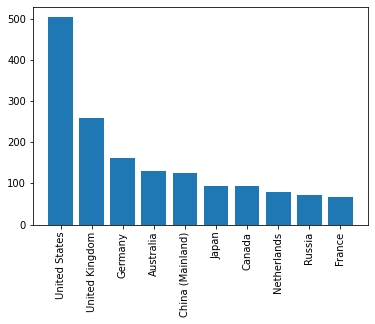

In [0]:
import matplotlib.pyplot as plt
import numpy as np

var=d1.collect()
country=[]
cnt=[]
c=0
for i in var:
    if c==10:
        break
    cnt.append(i['count(research_output)'])
    country.append(i['country'])
    c+=1
plt.bar(country,cnt)
plt.xticks(np.arange(0,len(country)),country,rotation='vertical')
plt.show()

In [0]:
display(df_new)

university year rank_display score link country city region logo type research_output student_faculty_ratio international_students size faculty_count Massachusetts Institute of Technology (MIT) 2017 1 100.0 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit United States Cambridge North America https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small.jpg Private Very High 4.0 3730 M 3,065 Stanford University 2017 2 98.7 https://www.topuniversities.com/universities/stanford-university United States Stanford North America https://www.topuniversities.com/sites/default/files/stanford-university_573_small.jpg Private Very High 3.0 3879 L 4,725 Harvard University 2017 3 98.3 https://www.topuniversities.com/universities/harvard-university United States Cambridge North America https://www.topuniversities.com/sites/default/files/harvard-university_253_small.jpg Private Very High 5.0 5877 L 4,646 University of Cambridge 2017 4 97.2 https://www.topuniversities.com/universities/university-cambridge United Kingdom Cambridge Europe https://www.topuniversities.com/sites/default/files/university-of-cambridge_95_small.jpg Public Very high 4.0 7925 L 5,800 California Institute of Technology (Caltech) 2017 5 96.9 https://www.topuniversities.com/universities/california-institute-technology-caltech United States Pasadena North America https://www.topuniversities.com/sites/default/files/california-institute-of-technology-caltech_94_small.jpg Private Very High 2.0 692 S 968 University of Oxford 2017 6 96.8 https://www.topuniversities.com/universities/university-oxford United Kingdom Oxford Europe https://www.topuniversities.com/sites/default/files/university-of-oxford_478_small.jpg Public Very High 3.0 8442 L 6,708 UCL 2017 7 95.6 https://www.topuniversities.com/universities/ucl United Kingdom London Europe https://www.topuniversities.com/sites/default/files/ucl_592560cf2aeae70239af4bf1_small.jpg Public Very High 5.0 21824 XL 7,195 ETH Zurich - Swiss Federal Institute of Technology 2017 8 94.2 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology Switzerland Zürich Europe https://www.topuniversities.com/sites/default/files/eth-zurich-swiss-federal-institute-of-technology_201_small.jpg Public Very High 7.0 7733 L 2,719 Imperial College London 2017 9 94.1 https://www.topuniversities.com/universities/imperial-college-london United Kingdom London Europe https://www.topuniversities.com/sites/default/files/imperial-college-london_592560cf2aeae70239af4be8_small.jpg Public Very High 5.0 11143 L 8,000 University of Chicago 2017 10 93.0 https://www.topuniversities.com/universities/university-chicago United States Chicago North America https://www.topuniversities.com/sites/default/files/university-of-chicago_120_small.jpg Private Very High 6.0 4696 L 2,703 Princeton University 2017 11 92.8 https://www.topuniversities.com/universities/princeton-university United States Princeton North America https://www.topuniversities.com/sites/default/files/princeton-university_508_small.jpg Private Very High 8.0 1912 M 1,050 National University of Singapore (NUS) 2017 12 91.5 https://www.topuniversities.com/universities/national-university-singapore-nus Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/national-university-of-singapore-nus_443_small.jpg Public Very High 7.0 7551 XL 4,288 Nanyang Technological University, Singapore (NTU) 2017 13 91.4 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-ntu Singapore Singapore Asia https://www.topuniversities.com/sites/default/files/nanyang-technological-university-singapore-ntu_592560cf2aeae70239af4c32_small.jpg Public Very High 6.0 6091 L 3,812 EPFL 2017 14 91.1 https://www.topuniversities.com/universities/epfl Switzerland Lausanne Europe https://www.topuniversities.com/sites/default/files/epfl-ecole-polytechnique-federale-de-lausanne_592560cf2aeae7

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import dense_rank


windowSpec  = Window.partitionBy("year").orderBy(desc("score"))
display(df_new.withColumn("dense_rank",dense_rank().over(windowSpec)).select('university','year','dense_rank','score','rank_display'))

university year dense_rank score rank_display Stanford University 2017 1 98.7 2 Harvard University 2017 2 98.3 3 University of Cambridge 2017 3 97.2 4 California Institute of Technology (Caltech) 2017 4 96.9 5 University of Oxford 2017 5 96.8 6 UCL 2017 6 95.6 7 ETH Zurich - Swiss Federal Institute of Technology 2017 7 94.2 8 Imperial College London 2017 8 94.1 9 University of Chicago 2017 9 93.0 10 Princeton University 2017 10 92.8 11 National University of Singapore (NUS) 2017 11 91.5 12 Nanyang Technological University, Singapore (NTU) 2017 12 91.4 13 EPFL 2017 13 91.1 14 Yale University 2017 14 90.9 15 Cornell University 2017 15 90.1 16 Johns Hopkins University 2017 16 89.3 17 University of Pennsylvania 2017 17 89.0 18 The University of Edinburgh 2017 18 88.9 19 Columbia University 2017 19 88.6 20 King's College London 2017 20 87.7 21 The Australian National University 2017 21 87.3 22 University of Michigan-Ann Arbor 2017 22 86.4 23 Tsinghua University 2017 23 86.0 24 Duke University 2017 23 86.0 24 Northwestern University 2017 24 85.7 26 The University of Hong Kong 2017 25 85.4 27 University of California, Berkeley (UCB) 2017 26 85.2 28 The University of Manchester 2017 27 84.8 29 McGill University 2017 28 84.1 30 University of California, Los Angeles (UCLA) 2017 29 84.0 31 University of Toronto 2017 30 83.8 32 The University of Tokyo 2017 31 82.6 34 Seoul National University 2017 32 82.1 35 The Hong Kong University of Science and Technology 2017 33 81.8 36 Kyoto University 2017 34 81.7 37 The London School of Economics and Political Science (LSE) 2017 34 81.7 37 Peking University 2017 35 81.3 39 University of California, San Diego (UCSD) 2017 36 80.6 40 Ecole normale supérieure, Paris 2017 37 79.9 33 University of Bristol 2017 38 79.6 41 The University of Melbourne 2017 39 79.5 42 Fudan University 2017 40 79.4 43 The Chinese University of Hong Kong (CUHK) 2017 41 78.1 44 University of British Columbia 2017 42 78.0 45 The University of Sydney 2017 43 77.9 46 New York University (NYU) 2017 43 77.9 46 KAIST - Korea Advanced Institute of Science & Technology 2017 43 77.9 46 The University of New South Wales (UNSW Sydney) 2017 44 77.8 49 Brown University 2017 44 77.8 49 The University of Queensland 2017 45 77.6 51 The University of Warwick 2017 45 77.6 51 University of Wisconsin-Madison 2017 46 75.7 53 City University of Hong Kong 2017 47 75.4 55 Tokyo Institute of Technology (Tokyo Tech) 2017 48 74.9 56 University of Amsterdam 2017 49 74.3 57 Carnegie Mellon University 2017 50 74.2 58 University of Washington 2017 51 73.9 59 Technical University of Munich 2017 52 72.4 60 Shanghai Jiao Tong University 2017 53 72.2 61 Delft University of Technology 2017 54 72.1 62 Osaka University 2017 55 71.7 63 University of Glasgow 2017 55 71.7 63 Monash University 2017 56 71.6 65 University of Illinois at Urbana-Champaign 2017 57 71.4 66 University of Texas at Austin 2017 58 70.7 67 Ludwig-Maximilians-Universität München 2017 59 70.2 68 National Taiwan University (NTU) 2017 59 70.2 68 University of Copenhagen 2017 59 70.2 68 Ecole Polytechnique 2017 60 69.9 53 Georgia Institute of Technology 2017 61 69.8 71 Ruprecht-Karls-Universität Heidelberg 2017 62 69.7 72 Lund University 2017 63 69.1 73 Durham University 2017 64 68.8 74 Tohoku University 2017 65 68.7 75 University of Nottingham 2017 65 68.7 75 University of St Andrews 2017 66 68.2 77 University of North Carolina, Chapel Hill 2017 67 68.1 78 KU Leuven 2017 68 67.9 79 University of Zurich 2017 69 67.8 80 The University of Auckland 2017 70 67.3 81 University of Birmingham 2017 71 67.2 82 Pohang University of Science And Technology (POSTECH) 2017 72 67.0 83 The University of Sheffield 2017 73 66.9 84 Universidad de Buenos Aires (UBA) 2017 74 65.8 85 University of California, Davis 2017 74 65.8 85 University of Southampton 2017 75 65.6 87 The Ohio State University 2017 76 65.4 88 Boston University 2017 77 65.2 89 Rice University 2017 78 65.0 90 University of Helsinki 2017 79 64.7 91 Purdue

In [0]:
%sql



In [0]:
df_new.write.mode("overwrite").partitionBy('year').format("delta").saveAsTable("redwine_presentation.qs_ranking")